## <u> Competitive Imbalance: Rainbow Six Siege</u>

<font color=red>Note:  Read this link: https://www.ubisoft.com/en-us/game/rainbow-six/siege/game-info, and watch this video: https://www.youtube.com/watch?v=rfcoToVjJVc, to fully understand Rainbow Six: Siege gameplay, and gain context towards this analysis</font>

#### <u> Motivation: </u>

In this short exploratory analysis of Rainbow Six: Siege data, my goal is to identify counters to the claim that Siege is a perfectly balanced game.  These include: a huge spread on pick rate of certain characters, Win rates for characters greater than 55%, and Win Rates for roles in general greater than 55%.  If these sorts of statistics are present, it may be an indicator of game imbalance, and should be promptly corrected to the best of the game developers' abilities.

Sometimes in competitive video games, certain playable characters, map environments, or abilities can be either too strong, or too weak compared to others.  Characters might have abilities that have almost zero counters, or maps may completely favor one team to another depending on their role, e.g.: Attacking/Defending.  If these imbalances are not made aware and changed in a prompt time frame, the game can become hard or simply un-fun to play; as you may lose due to a game mechanic that you cannot play against.

The same can be said for sports or other competitive environments, where some rules may be deemed archaic or outdated, and hinder the player's or give them an advantage.  An example of this is in the UFC, where a fighter cannot kick an opponent who is on the ground, so that opponent can leg lock you with almost no counter to be had from the other fighter.  These fules should be reviewed and updated periodically, just as developers modify and edit their in game mechanics; aka the game's 'rules'.

#### <u>Initial Questions, and Answers: ABSTRACT</u>
<b>1. What to do if player character imbalanced?</b>
+ Weaken/Strengthen character's equipment or abilities
    + A nerf/buff could also come in the form of weakening/strengthening another player who is a counter to said player
    + Or by changing/modifying the ability itself.
        + In Siege's case, this meant taking away an ACOG scope from certain characters, not allowing them to get headshots on opponents as easily.
   
<b>2. What to do if map imbalanced?</b>
+ Rework map environment, change certain areas, remove or add obstacles, take away windows, and change objective locations

<b>3. How do video game imbalances relate to real world sports/competitive environments?</b>
+ Sometimes, rules in sports/competitive events can become outdated or hindering.  Just like how video games change and rework rules/maps/characters, sports and other competititions should also consider reviewing over rules in a more frequent manner.

#### <u> Libraries Used: </u>

+ Pandas: Used to aggregate, modify dataframes
+ Numpy: Aiding Pandas in its data manipulation
+ MatplotLib: Visualizations
+ Scipy.Stats: For statistical testing of hypothesis tests
+ Seaborn: Visualizations
+ Sklearn: For Scaling properties in the preprocessing library
+ Warnings: to filter out any warnings/exceptions

In [69]:
## Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## <u><font color = blue>Reading in Datasets:</font></u>

In [70]:
# Read in Datasets:
operators = pd.read_csv('S5_operators.csv',sep = ';')
objectives = pd.read_csv('S5_objectives.csv', sep = ';')


In [71]:
# Take a look at the operators dataset
operators.head()

,platform,dateid,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,CLAYMORE,6,6,6,8
1,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,STUN GRENADE,4,2,6,8
2,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,CLAYMORE,37,40,49,70
3,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,STUN GRENADE,17,24,31,41
4,PC,20170210,Bronze,Attacker,G.E.O.-JACKAL,C7E,ITA12S,BREACH CHARGE,74,123,127,174


In [72]:
# Take a look at the objectives ddata set
objectives.head()

,platform,dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0,0,1,1
1,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-MONTAGNE,1,0,2,3
2,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,0,0,1,1
3,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,JTF2-BUCK,0,0,1,1
4,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,SAS-THATCHER,0,0,1,1


In [73]:
# How big is the data?
print(operators.shape)
print(objectives.shape)

(509692, 12)
(999998, 12)


From looking at the head of both DataFrames, we can get a feel for how the data looks.  Here is some further explanation as to what each column represents:

### Objectives:
1. platform:  PC, XBOX, Playstation 4
2. Dateid: Date the match was played on
3. gamemode:  Which in game mode was played (Bomb, Hostage, Secure Area)
4. mapname:  Which in game map or environment the match was played on
5. objectivelocation:  Which objective sight was that round of the match played on (There are multiple in each map)
6. skillrank: What the overall skill ranking of every player in the match was
7. role: Attacker or Defender
8. operator: Which operator was picked for that round for a given player
9. nbwins: Amount of wins that match (0 or 1)
10. nbkills: Amount of kills that match
11. nbdeaths: Amount of deaths that match
12. nbpicks: Amount of rounds played

### Operators:
1. platform:  PC, XBOX, Playstation 4
2. Dateid: Date the match was played on
3. skillrank: Overall skill ranking of every player in the match
4. role: Attacker or Defender
5. operator: Which operator was picked for that round for a given player
6. primaryweapon: Which primary weapon they picked 
7. secondaryweapon: Which secondary weapon they picked
8. secondarygadget:  Which secondary gadget they picked.  (Primary gadget is fixed depending on which operator was chosen)
9. nbwins: Amount of wins that match (0 or 1)
10. nbkills: Amount of kills that match
11. nbdeaths: Amount of deaths that match
12. nbpicks: Amount of rounds played

## <u><font color = blue>Data Wrangling:</font></u>

In [74]:
## Cleaning Data:

# Using only PC platform rows, then deleting dateid, platform, primaryweapon, secondaryweapon, and gadget columns
operators = operators.loc[operators['platform'] == ('PC')]
operators.drop(['dateid','platform','primaryweapon','secondaryweapon','secondarygadget'], axis=1, inplace=True)

# Group: skillrank, role, and operator
# Sum up rounds won, kills, deaths, and rounds played across all ranks for each group
operators = operators.groupby(['skillrank','role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()
operators.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981
3,Bronze,Attacker,GIGN-RESERVE,377,432,701,946
4,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941


In [75]:
## Unique values of the gamemode column:
objectives['gamemode'].unique()

array(['PvP . BOMB', 'PvP . HOSTAGE', 'PvP . SECURE AREA'], dtype=object)

In [76]:
# Grabbing all values under the column gamemode
gamemodes = objectives['gamemode']

# Using replace to remove the prefix using regex and inplace
gamemodes.replace(to_replace='PvP . ', value='', regex=True, inplace=True)
objectives['gamemode'] = gamemodes
print(objectives['gamemode'].unique())

['BOMB' 'HOSTAGE' 'SECURE AREA']


In [77]:
# Deleting dateid, objectivelocation, and platform columns
objectives.drop(['dateid','platform','objectivelocation'], axis=1, inplace=True)

# Group: gamemode, mapname, skillname, role, and operator
# Sum up rounds won, kills, deaths, and rounds played across all ranks for each group
objectives = objectives.groupby(['gamemode', 'mapname', 'skillrank', 'role', 'operator'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()
objectives.head()

,gamemode,mapname,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,58,78,96,126
1,BOMB,BANK,Bronze,Attacker,G.E.O.-JACKAL,152,286,249,354
2,BOMB,BANK,Bronze,Attacker,GIGN-MONTAGNE,69,55,133,174
3,BOMB,BANK,Bronze,Attacker,GIGN-RESERVE,2,3,8,10
4,BOMB,BANK,Bronze,Attacker,GIGN-TWITCH,160,214,256,377


Now, I would like to remove the RESERVE operators, as they are only picked when you have no other operator to play, which is almost never.

In [78]:
## Removing Reserve operators:
operators = operators[~operators.operator.str.contains("RESERVE", na=False)]
objectives = objectives[~objectives.operator.str.contains("RESERVE", na=False)]

In [79]:
print(operators.operator.unique())
print(objectives.operator.unique())

['BOPE-CAPITAO' 'G.E.O.-JACKAL' 'GIGN-MONTAGNE' 'GIGN-TWITCH' 'GSG9-BLITZ'
 'GSG9-IQ' 'JTF2-BUCK' 'NAVYSEAL-BLACKBEARD' 'SAS-SLEDGE' 'SAS-THATCHER'
 'SAT-HIBANA' 'SPETSNAZ-FUZE' 'SPETSNAZ-GLAZ' 'SWAT-ASH' 'SWAT-THERMITE'
 'BOPE-CAVEIRA' 'G.E.O.-MIRA' 'GIGN-DOC' 'GIGN-ROOK' 'GSG9-BANDIT'
 'GSG9-JAGER' 'JTF2-FROST' 'NAVYSEAL-VALKYRIE' 'SAS-MUTE' 'SAS-SMOKE'
 'SAT-ECHO' 'SPETSNAZ-KAPKAN' 'SPETSNAZ-TACHANKA' 'SWAT-CASTLE'
 'SWAT-PULSE']
['BOPE-CAPITAO' 'G.E.O.-JACKAL' 'GIGN-MONTAGNE' 'GIGN-TWITCH' 'GSG9-BLITZ'
 'GSG9-IQ' 'JTF2-BUCK' 'NAVYSEAL-BLACKBEARD' 'SAS-SLEDGE' 'SAS-THATCHER'
 'SAT-HIBANA' 'SPETSNAZ-FUZE' 'SPETSNAZ-GLAZ' 'SWAT-ASH' 'SWAT-THERMITE'
 'BOPE-CAVEIRA' 'G.E.O.-MIRA' 'GIGN-DOC' 'GIGN-ROOK' 'GSG9-BANDIT'
 'GSG9-JAGER' 'JTF2-FROST' 'NAVYSEAL-VALKYRIE' 'SAS-MUTE' 'SAS-SMOKE'
 'SAT-ECHO' 'SPETSNAZ-KAPKAN' 'SPETSNAZ-TACHANKA' 'SWAT-CASTLE'
 'SWAT-PULSE']


## <u><font color = blue>Exploratory Data Analysis:</font></u>

In [80]:
colors = ["purple", "green", "blue", "pink", "brown", "red", "teal", "orange", "yellow", "grey", \
          "cyan", "bright green", "hot pink", "black", "maroon", "tan", "lavender", "goldenrod", "sky blue", "olive"]
new_palette = sns.xkcd_palette(colors)

#### <u> Kill/Death and Win/Loss Ratios: </u>

The Kill/Death and Win/Loss ratios are extremely useful indicators of performance in competitive gaming.  Ideally, you would want both to be as high as possible, but sometimes sacrificing a high Kill/Death ratio for a high Win/Loss ratio is needed.  This is because at the end of the day, Wins matter more than Kills in a match.  

The datasets provided by Ubisoft did not come suited with these statistics, so I must implement some Feature Engineering to include them.  

After calculating the KD and WL (Kill/Death, Win/Loss respectively), ratios, I will then create a new DataFrame, summing the number of kills, deaths, wins, and picks.  We can then see the relationship between KD and WL ratios.

In [81]:
operator_groups = operators.groupby(['role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Adding k/d and win ratio columns
operator_groups['kd_ratio'] = pd.to_numeric(operator_groups['nbkills']) / pd.to_numeric(operator_groups['nbdeaths'])
operator_groups['wl_ratio'] = pd.to_numeric(operator_groups['nbwins']) / pd.to_numeric(operator_groups['nbpicks'])

# Splitting data by role
ops_roles = operator_groups.groupby('role')



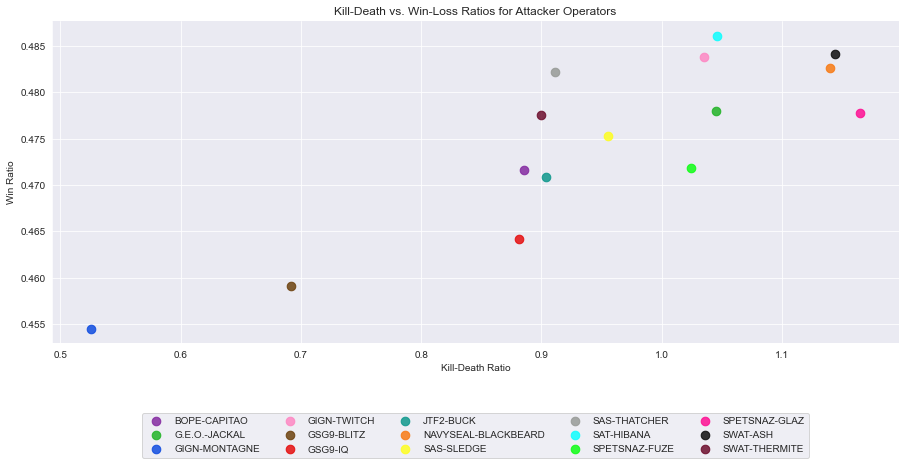

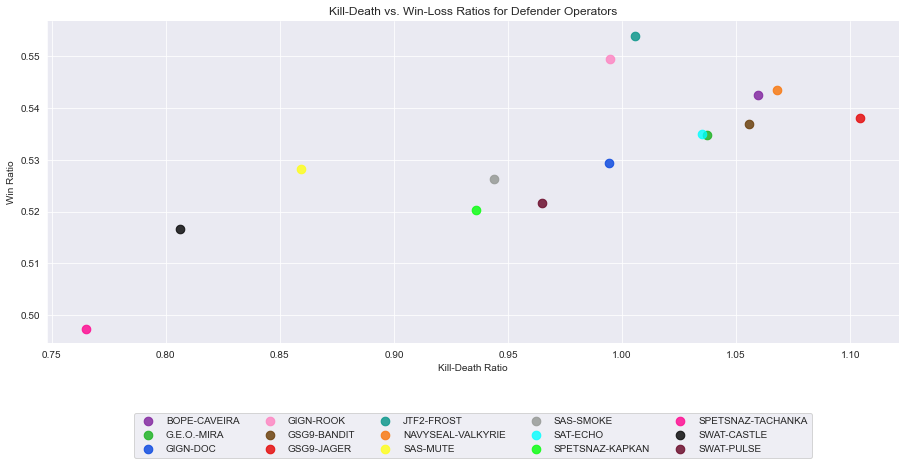

In [82]:
# Graphing Attackers and Defenders on separate graphs
sns.set_style('darkgrid')
for role, tbl in ops_roles:
    sns.lmplot(x="kd_ratio", y="wl_ratio", data=tbl, fit_reg=False, hue='operator', \
               legend=False, palette=new_palette, size=5, aspect=2.5, scatter_kws={"s": 75})
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title(f'Kill-Death vs. Win-Loss Ratios for {role} Operators')
    plt.xlabel('Kill-Death Ratio')
    plt.ylabel('Win Ratio')
#plt.tight_layout()  #preference based
plt.show()


#### Overall, the key observations from both charts are that certain operators that receive more kills per death also win more games on average, but that more kills doesn't always equate to more wins.

### <u> Picks and Win/Loss Ratios by Rank:</u>

I shall investigate how the picks rate of certain operators differ across ranks. With any competitive video game, there are Metas.  A Meta is a certain way of doing something in a game that will more often than not guarantee a win.  In other words, its an overpowered game mechanic, operator, or gadget that gets picked or played more often than others. 

I should expect that higher ranked players pick certain operators more often than lower ranked players, because they see their value, or are playing a specific Meta, that lower ranked players might not even be aware of.  This is a classic comparison between a casual player and a professional.

In [83]:
# Create dataframe to sum up rounds won, kills, deaths, and rounds played across all ranks for each rank, role, and operator
ops_by_rank = operators.groupby(['skillrank', 'role', 'operator'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

ops_by_rank.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981
3,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941
4,Bronze,Attacker,GSG9-BLITZ,7172,8352,11845,15665


The next question is whether or not standardization is necessary in this project.  To do this, lets look at a histogram of Rank counts in the dataset, to see it a certain Rank is represented disproportionately in the data.  

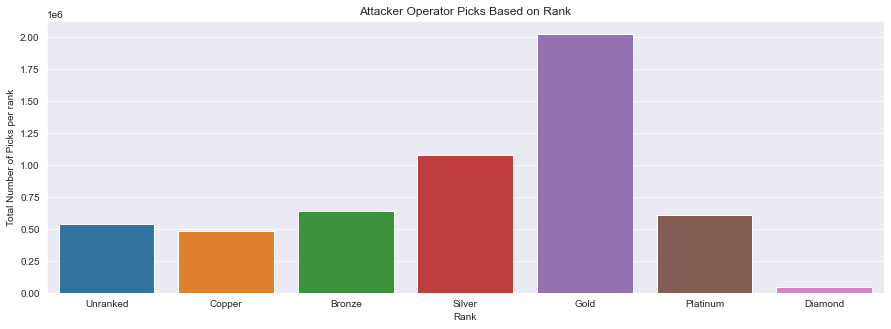

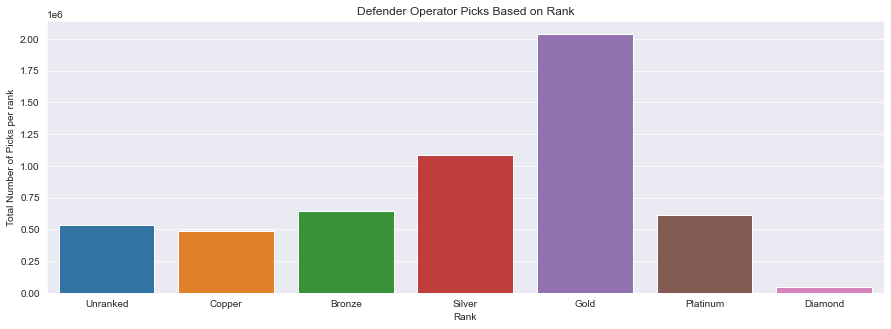

In [84]:
# Group: rank and role
# Summing the number of wins, kills, deaths, and picks for each group
total_ops_by_rank = operators.groupby(['skillrank', 'role'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Splitting data by role
total_ops_role = total_ops_by_rank.groupby('role')

# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Graphing Attackers and Defenders on separate graphs
for role, tbl in total_ops_role:
    plt.figure(figsize=(15,5))
    sns.barplot(x="skillrank", y="nbpicks", data=tbl, order=order)
    plt.title(f'{role} Operator Picks Based on Rank')
    plt.xlabel('Rank')
    plt.ylabel('Total Number of Picks per rank')
#plt.tight_layout()  #preference
plt.show()

Firstly, if both charts appear to be similar, its because they are identical.  This makes sense, because an Attacker of a certain rank is going to be a Defender of that same rank, as teams play both roles each game.  

Secondly, standardization is quite necessary, as the distribution between ranks is not even.  Additionally, the skill gap between ranks is mostly linear up until Gold.  After Gold, the jump to Platinum is exponential, and subsequently, the jump to Diamond is even more exponential.  This means that a Gold player is only a little bit better than a Silver player; but a Diamond player is lightyears ahead of a Gold Player in terms of skill.  We should focus on the Diamond players' pick rates for players, because they are more calculated based on Meta and objective best picks in a certain situation.

To standardize the data, I will use the preprocessing libraru from scikit learn:

In [85]:
frames =  []
sd_ops_by_rank = ops_by_rank.groupby(['skillrank','role'], as_index=False)

for group, tbl in sd_ops_by_rank:
        tbl['scaled_nbpicks'] = preprocessing.scale(tbl['nbpicks'])
        frames.append(tbl)
sd_ops_by_rank = pd.concat(frames)
sd_ops_by_rank.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks,scaled_nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383,-1.468177
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492,0.149944
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981,-0.844876
3,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941,0.604011
4,Bronze,Attacker,GSG9-BLITZ,7172,8352,11845,15665,-1.453022


Now that the number of picks for each operator are standardized (within their respective ranks), we can graph the results.

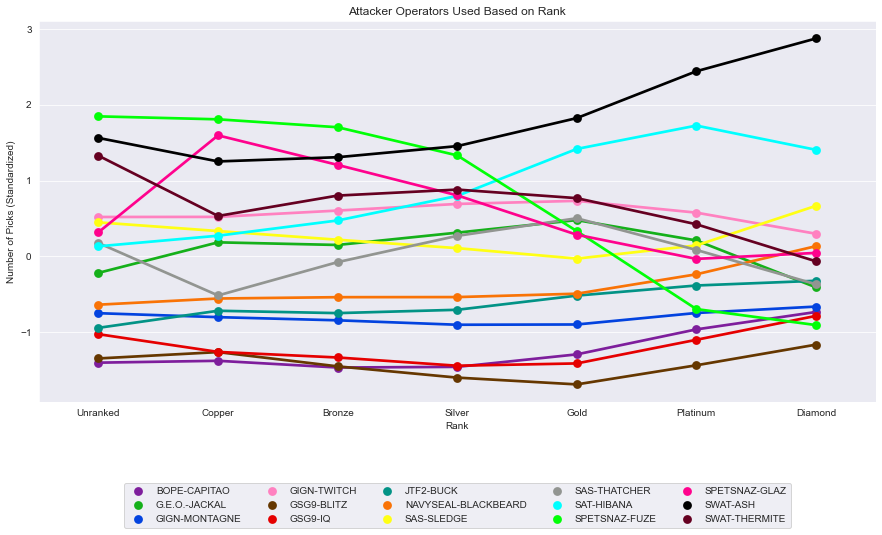

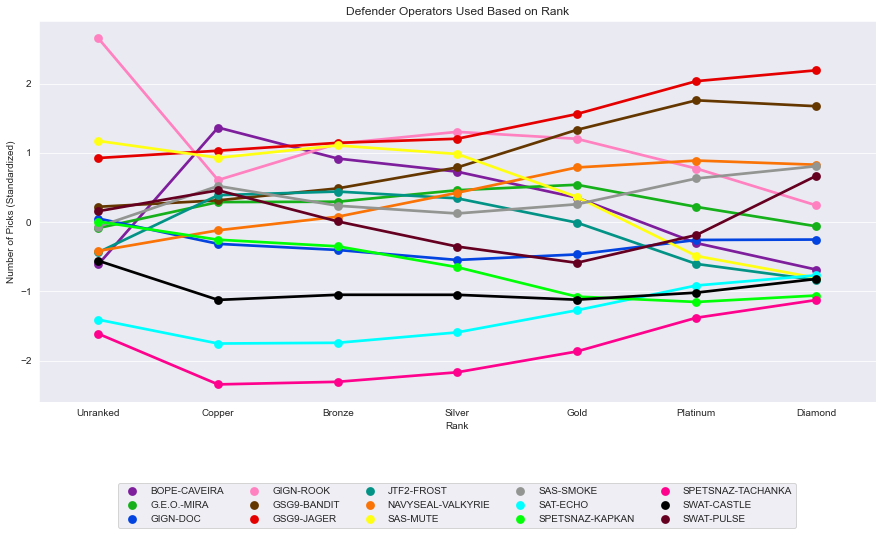

In [86]:
# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Splitting data by role
ops_by_rank_role = sd_ops_by_rank.groupby('role')

# Graphing Attackers and Defenders on separate graphs
for role, tbl in ops_by_rank_role:
    plt.figure(figsize=(15,7))
    sns.pointplot(x="skillrank", y="scaled_nbpicks", hue="operator", data=tbl, \
                  legend=False, palette=new_palette, size=5, aspect=2.5, order=order);
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title(role +' Operators Used Based on Rank')
    plt.xlabel('Rank')
    plt.ylabel('Number of Picks (Standardized)')
plt.savefig('operatorPickRate.png')
plt.show()


#### W/L Ratios for Ranks:


In [87]:
# Empty list of frames, so all the dataframes can be concatenated in the end
frames =  []

# Grouping by skillrank and role
wr_ops_by_rank = ops_by_rank.groupby(['skillrank','role'], as_index=False)

# Calculating win ratio for each grouping
for group, tbl in wr_ops_by_rank:
        tbl['win_ratio'] = pd.to_numeric(tbl['nbwins']) / pd.to_numeric(tbl['nbpicks'])
        frames.append(tbl)
wr_ops_by_rank = pd.concat(frames)
wr_ops_by_rank.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks,win_ratio
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383,0.463564
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492,0.469489
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981,0.451243
3,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941,0.477058
4,Bronze,Attacker,GSG9-BLITZ,7172,8352,11845,15665,0.457836


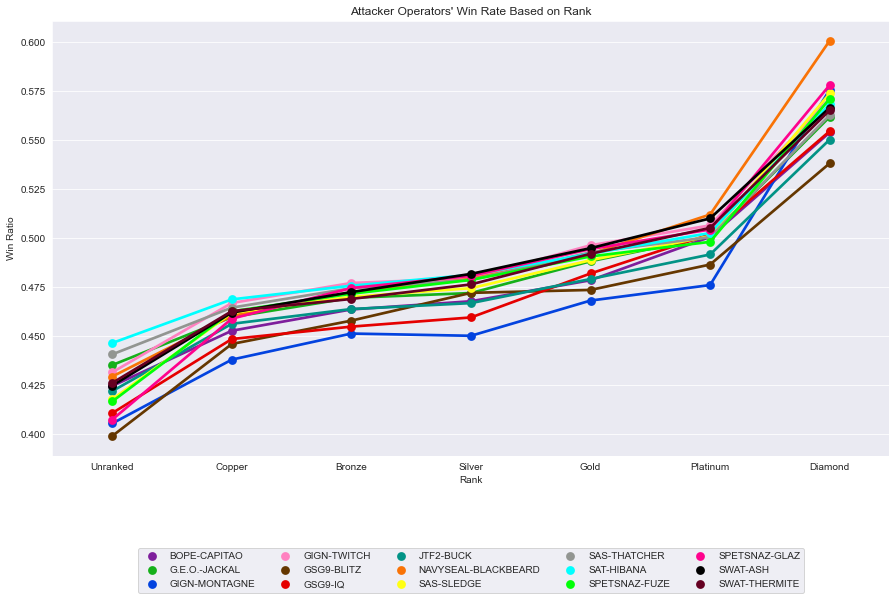

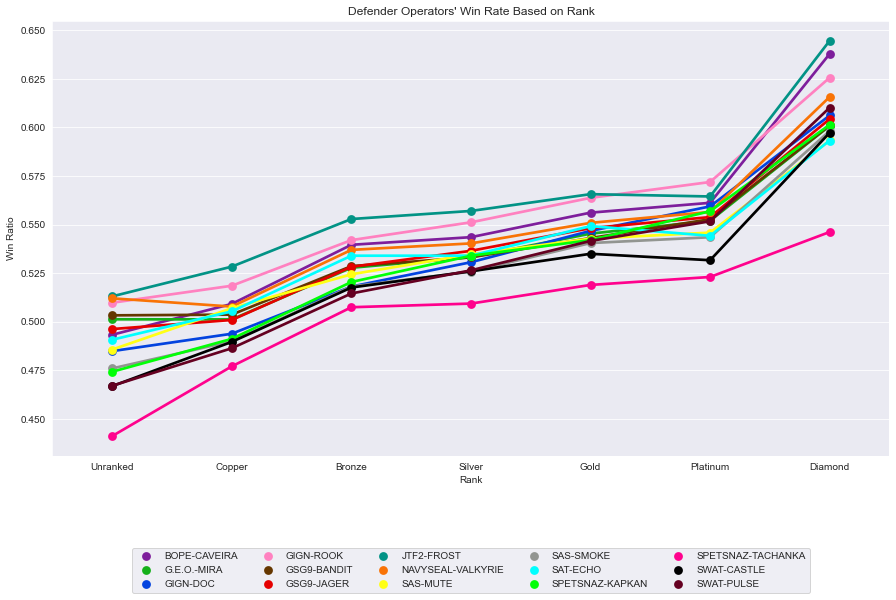

In [88]:
# Splitting data by role
wr_ops_by_rank_role = wr_ops_by_rank.groupby('role')

# Graphing Attackers and Defenders on separate graphs
for role, tbl in wr_ops_by_rank_role:
    plt.figure(figsize=(15,8))
    sns.pointplot(x="skillrank", y="win_ratio", hue="operator", data=tbl, \
                  legend=False, palette=new_palette, size=5, aspect=2.5, order=order);
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title(role + ' Operators\' Win Rate Based on Rank')
    plt.xlabel('Rank')
    plt.ylabel('Win Ratio')

plt.savefig('operatorWinRate.png')
plt.show()


From these two charts we can see that for the most part there is a positive correlation with ranking and WL ratio, for every operator. 

For the Attacking operators, Blackbeard, Ash, and Hibana outperform the rest of the operators consistently, with Blackbeard leading the pack in Diamond ranking. 

For Defending Operators, Frost, Rook, Caveira and Valkyrie constantly outperform the rest of the operators.

#### The main take away from these graphs is that the spread of WL ratio depending on operators per rank is minimal, but that there are some key operators that win the most across all ranks.  

## <u><font color = blue>Final Charts:</font></u>

In [89]:
# Group: mapname, role, operator
# Summing number of wins, kills, deaths, and picks for each group
objectives_map = objectives.groupby(['mapname', 'role', 'operator'], as_index=False)\
                    ['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Adding win ratio columns to Objectives data
objectives_map['kd_ratio'] = pd.to_numeric(objectives_map['nbkills']) / pd.to_numeric(objectives_map['nbdeaths'])
objectives_map['win_ratio'] = pd.to_numeric(objectives_map['nbwins']) / pd.to_numeric(objectives_map['nbpicks'])
objectives_map.head()

,mapname,role,operator,nbwins,nbkills,nbdeaths,nbpicks,kd_ratio,win_ratio
0,BANK,Attacker,BOPE-CAPITAO,1902,2778,3201,4321,0.867854,0.440176
1,BANK,Attacker,G.E.O.-JACKAL,7432,12435,11690,16333,1.063730,0.455030
2,BANK,Attacker,GIGN-MONTAGNE,2957,2619,5043,6941,0.519334,0.426019
3,BANK,Attacker,GIGN-TWITCH,6884,10439,10672,15419,0.978167,0.446462
4,BANK,Attacker,GSG9-BLITZ,1075,1311,1963,2556,0.667855,0.420579


In [90]:
# Create the color scale
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Splitting data by role
objectives_map_role = objectives_map.groupby('role')

def winRateGrid(groupBy_DF,colorscale = cmap):
    """
    input: groupBy pandas.DataFrame of operators, maps and objectives, grouped on role (Attacker/Defender) 
    
    output: a 2 dimensional color grid that can shows 
    
    This function will illustrate win rates for certain operators on certain maps in the groupBy dataframe.
    A higher win rate corresponds to a 'hotter' or more red hue, where as a lower win rate is more blue.
    There will be two charts, one for each role: Attacker, and Defender
    
    """
    

    for role, tbl in groupBy_DF:
        pivot = tbl.pivot(index='mapname', columns='operator', values='win_ratio')
        f, ax = plt.subplots(figsize=(12,9))
        plt.title(f'{role} Win Rate per Map per Operator')
        sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)

    plt.savefig('mapWinRate.png')
    plt.show()




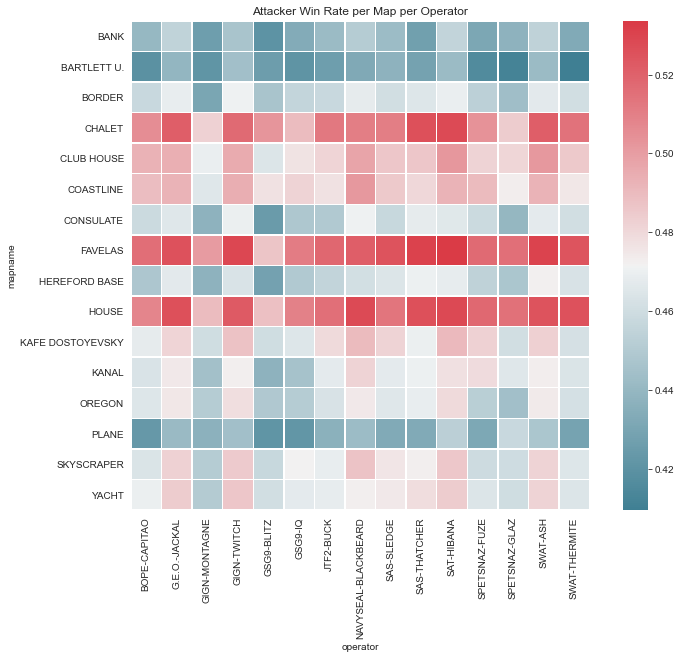

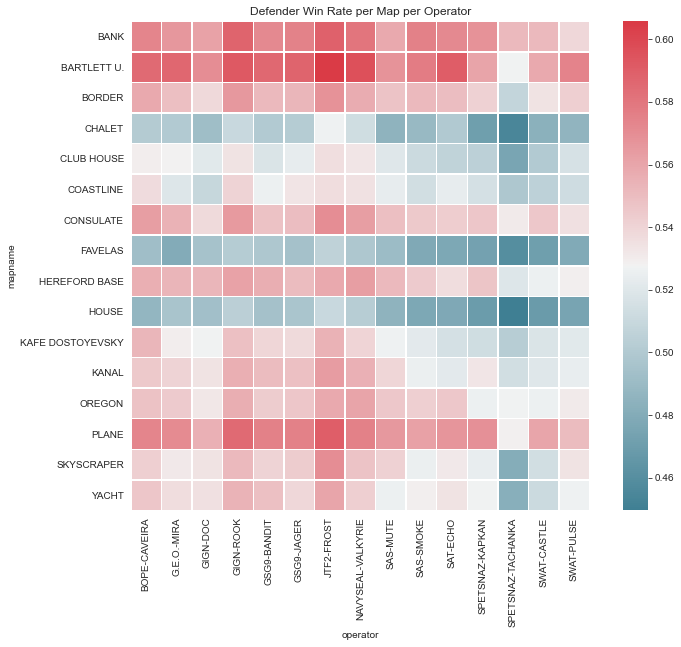

In [91]:
## Call the function to create the grids:
winRateGrid(objectives_map_role)

An important question for people not familiar with Rainbow Six Siege is: What do these heatmaps represent?  For both Attackers and Defenders, the Win rate for each operator for each map is displaued.  A perfectly balanced map is where both Defenders and Attackers win 50% or 0.5 of the time. 

The first observation is that Defender's seem to be winning more often than not, with the win rate being greater than 0.5.  This is because for the most part, Attackers have to take the fight to Defenders, whereas Defenders can essentially just hold out to secure a win.  Additionally, there are certain maps where Defenders and Attackers each win most of the time, indicating that those certain maps are not entirely balanced for both roles.  

Secondly from these charts we can see if certain operators perform poorly on certain or all maps.  Theses operators include: Montagne, Blitz, and Glaz on attack, and Tachanka on defense.  On the flipside, operators that perform better than most are: Ash, Hibana, Blackbeard, and Jackal on attack, as well as Frost, Valkyrie and Caveira on defense.

The main takeaway from these charts is that certain maps might favor Attackers or Defenders, and that certain operators perform more poor or better than all other operators consistently.

## <u><font color = blue> Conclusion:</font><u> 
Over the course of this project, the concept of balance in competitive video games was visited through Rainbow Six Siege. Through EDA, we explored pick rates of different operators, KD ratios of different operators throughout different rank ranges, as well as the WL ratios and saw a positive correlation between receiving kills and wins.  Additionally, there were a few operators on Attack and Defense where their pick rates were higher and lower than most, and Win/Loss ratios also higher.  This might indicate that there is some imbalance in how they operate compared to the rest.  Finally, the heatmaps we produced showed that certain maps had Attackers or Defenders winning most of the time; around 55-60%.  These maps will need to be reworked/altered, or completely taken out of the game to keep Rainbow Six Siege perfectly competitive, and as close to balanced as possible.  If these changes are implemented, then the game will continue to be one of the most fun and competitive shooters on the market.

